# Logistic Regression and Random Forest Classifier Test
## Author: Ethan Cramer

### Classes:
0.  Acoustic/Folk
1.  Alt Music
2.  Blues
3.  Bollywood
4.  Country
5.  HipHop
6.  Indie Alt
7.  Instrumental
8.  Metal
9.  Pop
10. Rock

In [1]:
import matplotlib.pyplot as plt
from math import sqrt, isnan
import pandas as pd
import numpy as np

In [34]:
# Load Dataset
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("train.csv")

# Use this to filter features that you might not want
feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

# Feel free to adjust the test_size, random_state, and columns that should be used.
X_train, X_test, y_train, y_test = train_test_split(dataset[feature_columns], dataset['Class'], 
                                                    test_size=0.2, random_state=42)

# If the model that you are using doesn't split the training set into a validation set, here is a basic holdout set for validation that is commented out by default
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [35]:
# Preprocessing

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=42)
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier

rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train, y_train)

print(rfc_1.score(X_test, y_test))

rfc_2 = OneVsOneClassifier(RandomForestClassifier()) 
rfc_2.fit(X_train, y_train)

print(rfc_2.score(X_test, y_test))

0.5008333333333334
0.49083333333333334


In [48]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

lrc_1 = LogisticRegression(solver='lbfgs', max_iter=300) 
lrc_1.fit(X_train, y_train)

print(lrc_1.score(X_test, y_test))

lrc_2 = LogisticRegression(solver='liblinear')
lrc_2.fit(X_train, y_train)

print(lrc_2.score(X_test, y_test))

0.4822222222222222
0.47


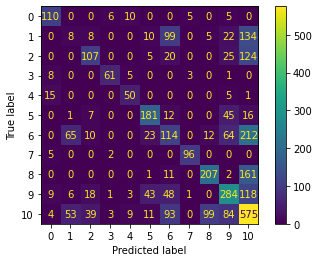

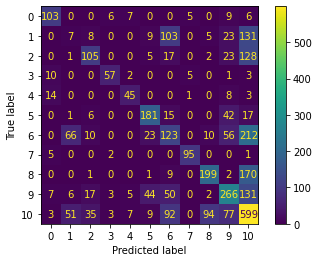

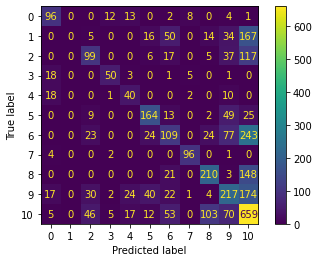

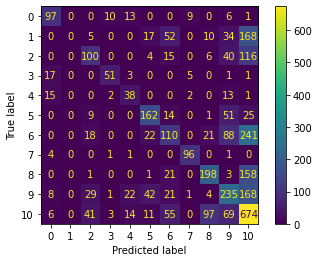

In [ ]:
# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Worst Performers: 1 < 6 < 2 < 9 < 8 < 10
# Tends to predict 'Alt_Music' as 'Indie Alt' and 'Rock'
# Half of 'Blues' is predicted as 'Rock'dataset
# 'Indie Rock' frequently predicted as 'Rock'
# 'Metal' frequently predicted as 'Rock'
predictions = rfc_1.predict(X_test) 
cm1 = confusion_matrix(y_test, predictions, labels = rfc_1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=rfc_1.classes_)
disp1.plot()

predictions = rfc_2.predict(X_test) 
cm2 = confusion_matrix(y_test, predictions, labels = rfc_2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rfc_2.classes_)
disp2.plot()
plt.show()

predictions = lrc_1.predict(X_test) 
cm3 = confusion_matrix(y_test, predictions, labels = lrc_1.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=lrc_1.classes_)
disp3.plot()
plt.show()

predictions = lrc_2.predict(X_test) 
cm4 = confusion_matrix(y_test, predictions, labels = lrc_2.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=lrc_2.classes_)
disp4.plot()
plt.show()

In [49]:
# Grid Search for Logistic Regression
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit

C_range = np.logspace(-5, 5, 13) # 10^-5 to 10^5

# Model using default parameters
default_lr = LogisticRegression(solver='lbfgs', max_iter=300)
print("Default Validation Accuracy is %0.3f" % (np.mean(cross_val_score(default_lr, X_train, y_train, cv=5))))

# Exhaustive grid search to find the hyperparameters that give the highest accuracy
tuned_parameters = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=300), param_grid=tuned_parameters, cv=cv)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.3f" % (grid.best_params_, grid.best_score_))

# Model using highest accuracy parameters
tuned_lr = LogisticRegression(solver='lbfgs', max_iter=300, C=grid.best_params_['C'])
print("Tuned Validation Accuracy is %0.3f" % (np.mean(cross_val_score(tuned_lr, X_train, y_train, cv=5))))

tuned_lr.fit(X_train, y_train)
print("Final Test Set Accuracy is %0.3f" % tuned_lr.score(X_test, y_test))

Default Validation Accuracy is 0.495


E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:

The best parameters are {'C': 1.0} with a score of 0.500
Tuned Validation Accuracy is 0.495
Final Test Set Accuracy is 0.482


In [52]:
# Grid Search for Random Forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # n_estimators: 10^0 to 10^5
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Model using default parameters
default_rf = RandomForestClassifier()
print("Default Validation Accuracy is %0.3f" % (np.mean(cross_val_score(default_rf, X_train, y_train, cv=5))))

# Exhaustive grid search to find the hyperparameters that give the highest accuracy
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(RandomForestClassifier(), param_grid=random_grid, cv=cv)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.3f" % (grid.best_params_, grid.best_score_))

# Model using highest accuracy parameters
tuned_rf = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'])
print("Tuned Validation Accuracy is %0.3f" % (np.mean(cross_val_score(tuned_rf, X_train, y_train, cv=5))))

tuned_rf.fit(X_train, y_train)
print("Final Test Set Accuracy is %0.3f" % tuned_rf.score(X_test, y_test))

Default Validation Accuracy is 0.502


KeyboardInterrupt: 